   ### Predizer o preço de carros

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
caminho = 'D:/Projetos_Data_Science/Machine Learning_Regressao_Linear - Predicao dos precos de carros/Dados/CarPrice_Assignment.csv'
df = pd.read_csv(caminho, sep=',', header=0)

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [20]:
df.shape

(205, 25)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [7]:
## Com o método ILOC, consigo visualizar informaçoes de todas as colunas, para entender o dataset que estamos utilizando
df.iloc[0]

car_ID                               1
symboling                            3
CarName             alfa-romero giulia
fueltype                           gas
aspiration                         std
doornumber                         two
carbody                    convertible
drivewheel                         rwd
enginelocation                   front
wheelbase                         88.6
carlength                        168.8
carwidth                          64.1
carheight                         48.8
curbweight                        2548
enginetype                        dohc
cylindernumber                    four
enginesize                         130
fuelsystem                        mpfi
boreratio                         3.47
stroke                            2.68
compressionratio                     9
horsepower                         111
peakrpm                           5000
citympg                             21
highwaympg                          27
price                    

In [8]:
## Iremos identificar se possuem missing no dataset
## Identificamos que não existem valores faltantes no dataset
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [12]:
# Deletei a coluna 'car_ID', pois nao é util em nossas analisem nem no modelo, uma vez que possuo INDEX em meu DF
df.drop(['car_ID'], axis=1, inplace=True)

In [25]:
# Verificamos que a coluna CarName, é composta pelo fabricante e nome do modelo do carro.
# Irei eparar em 2 colunas, 1 com o noe do fabricante e outra com o nome do modelo do carro

In [58]:
df['CompanyName'] = df['CarName'].apply(lambda x: x.split(' ')[0])

In [59]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [66]:
df['CompanyName'].replace('maxda', 'mazda',inplace=True)
df['CompanyName'].replace('Nissan', 'nissan',inplace=True)
df['CompanyName'].replace('porcshce', 'porsche',inplace=True)
df['CompanyName'].replace('toyouta', 'toyota',inplace=True)
df['CompanyName'].replace('vokswagen', 'volkswagen',inplace=True)
df['CompanyName'].replace('vw', 'volkswagen',inplace=True)

In [67]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Visualização dos dados

In [86]:
# dados para o grafico

type(df['CompanyName'].value_counts())

pandas.core.series.Series

In [89]:
dados = df['CompanyName'].value_counts()
type(dados)

pandas.core.series.Series

In [91]:
dados.index

Index(['toyota', 'nissan', 'mazda', 'honda', 'mitsubishi', 'subaru',
       'volkswagen', 'volvo', 'peugeot', 'dodge', 'buick', 'bmw', 'audi',
       'plymouth', 'saab', 'porsche', 'isuzu', 'jaguar', 'chevrolet',
       'alfa-romero', 'renault', 'mercury'],
      dtype='object')

In [93]:
dados.values

array([32, 18, 17, 13, 13, 12, 12, 11, 11,  9,  8,  8,  7,  7,  6,  5,  4,
        3,  3,  3,  2,  1], dtype=int64)

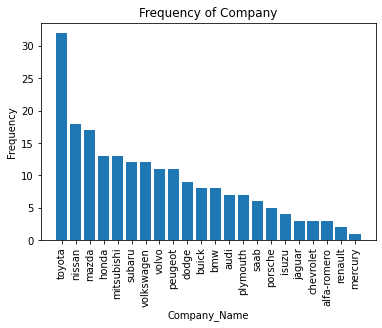

In [111]:
%matplotlib inline

x = dados.index
y = dados.values

plt.bar(x,y )
plt.title('Frequency of Company')
plt.xlabel('Company_Name')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')

plt.show()

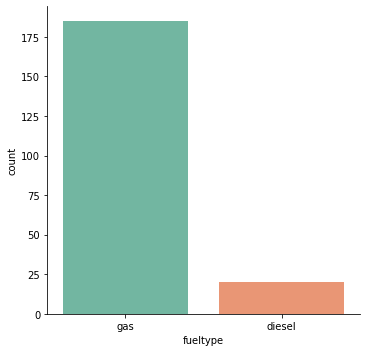

In [113]:
sns.catplot(x="fueltype", kind="count", palette="Set2", data=df);

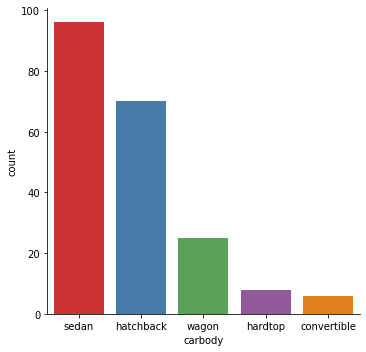

In [130]:
sns.catplot(x="carbody", 
            kind="count", 
            palette="Set1", 
            data=df, 
            order = df['carbody'].value_counts().index);

### Até o momento já conseguimos extrais alguns insites sobre os dados:
####  - O carro mais vendido é do fabricante Toyota
####  - A maioria dos carros vendidos possui o tipo de combustivel como gasolina
####  - O tipo de carro mais vendido são os Sedans

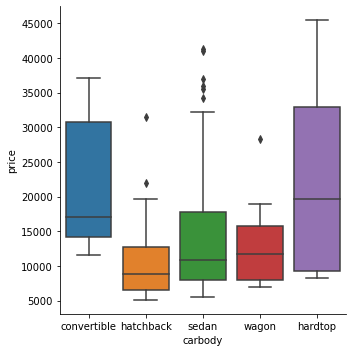

In [132]:
sns.catplot(x ='carbody', y='price', kind='box', data=df);

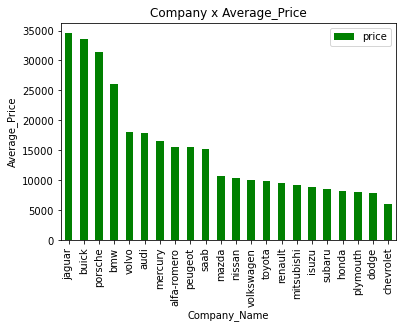

In [142]:
%matplotlib inline

dados1 = pd.DataFrame(df.groupby(by='CompanyName')['price'].mean().sort_values(ascending=False))

dados1.plot.bar(color='green')
plt.title('Company x Average_Price')
plt.xlabel('Company_Name')
plt.ylabel('Average_Price')
plt.xticks(rotation='vertical')

plt.show()



 #### As montadoras Jaguar e Builk possuem os maiores preços médios

### Verificar o relacionamento entre variaveis numericas

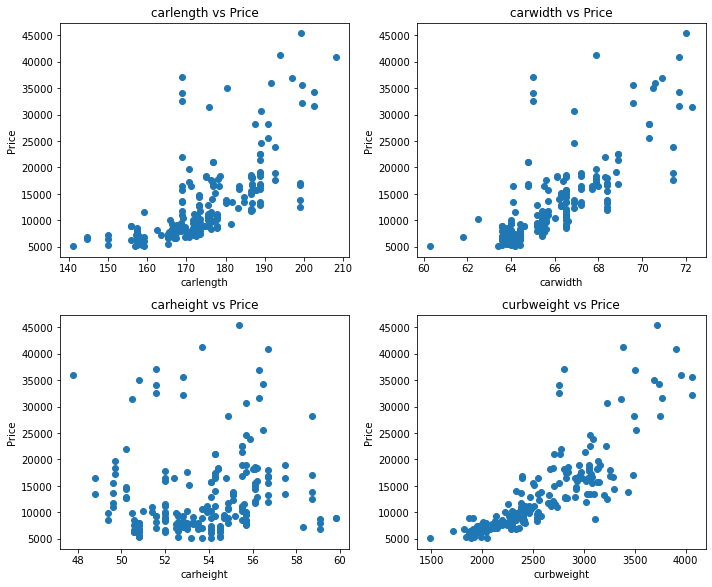

In [144]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

### Criaremos uma nova coluna chamada 'carsrange', que atravez do método CUT, irei dividir em 3 labels

In [148]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [149]:
label=['Budget','Medium','Highend']
df['carsrange'] = pd.cut(df['price'],3,labels = label)

In [152]:
df['carsrange'].value_counts()

Budget     174
Medium      19
Highend     12
Name: carsrange, dtype: int64

### Transformando colunas categoricas em numericas, pois o modelo somente aceita features numericas

In [156]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'CompanyName', 'carsrange'],
      dtype='object')

#### Primeiro, irei deletar as colunas que não iremos utilizar em nosso modelo

In [174]:
col_drop = ['CarName','CompanyName']
df.drop(col_drop, axis=1, inplace=True)

#### Definindo as colunas que serão transformadas de categoricas para numericas. Utilizando o método DUMMIES

In [176]:
colunas = ['fueltype', 'aspiration', 'doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber',
           'fuelsystem','carsrange']

In [178]:
df_final = pd.get_dummies(df,columns=colunas,dtype=int)

In [180]:
df_final.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carsrange_Budget,carsrange_Medium,carsrange_Highend
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,1,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,1,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,1,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,1,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,1,0,0,1,0,0


In [184]:
df_final.shape

(205, 56)

### Utilizando o mapa de calor, verificar as variáveis que possuem relacionamento com a variáel PRICE

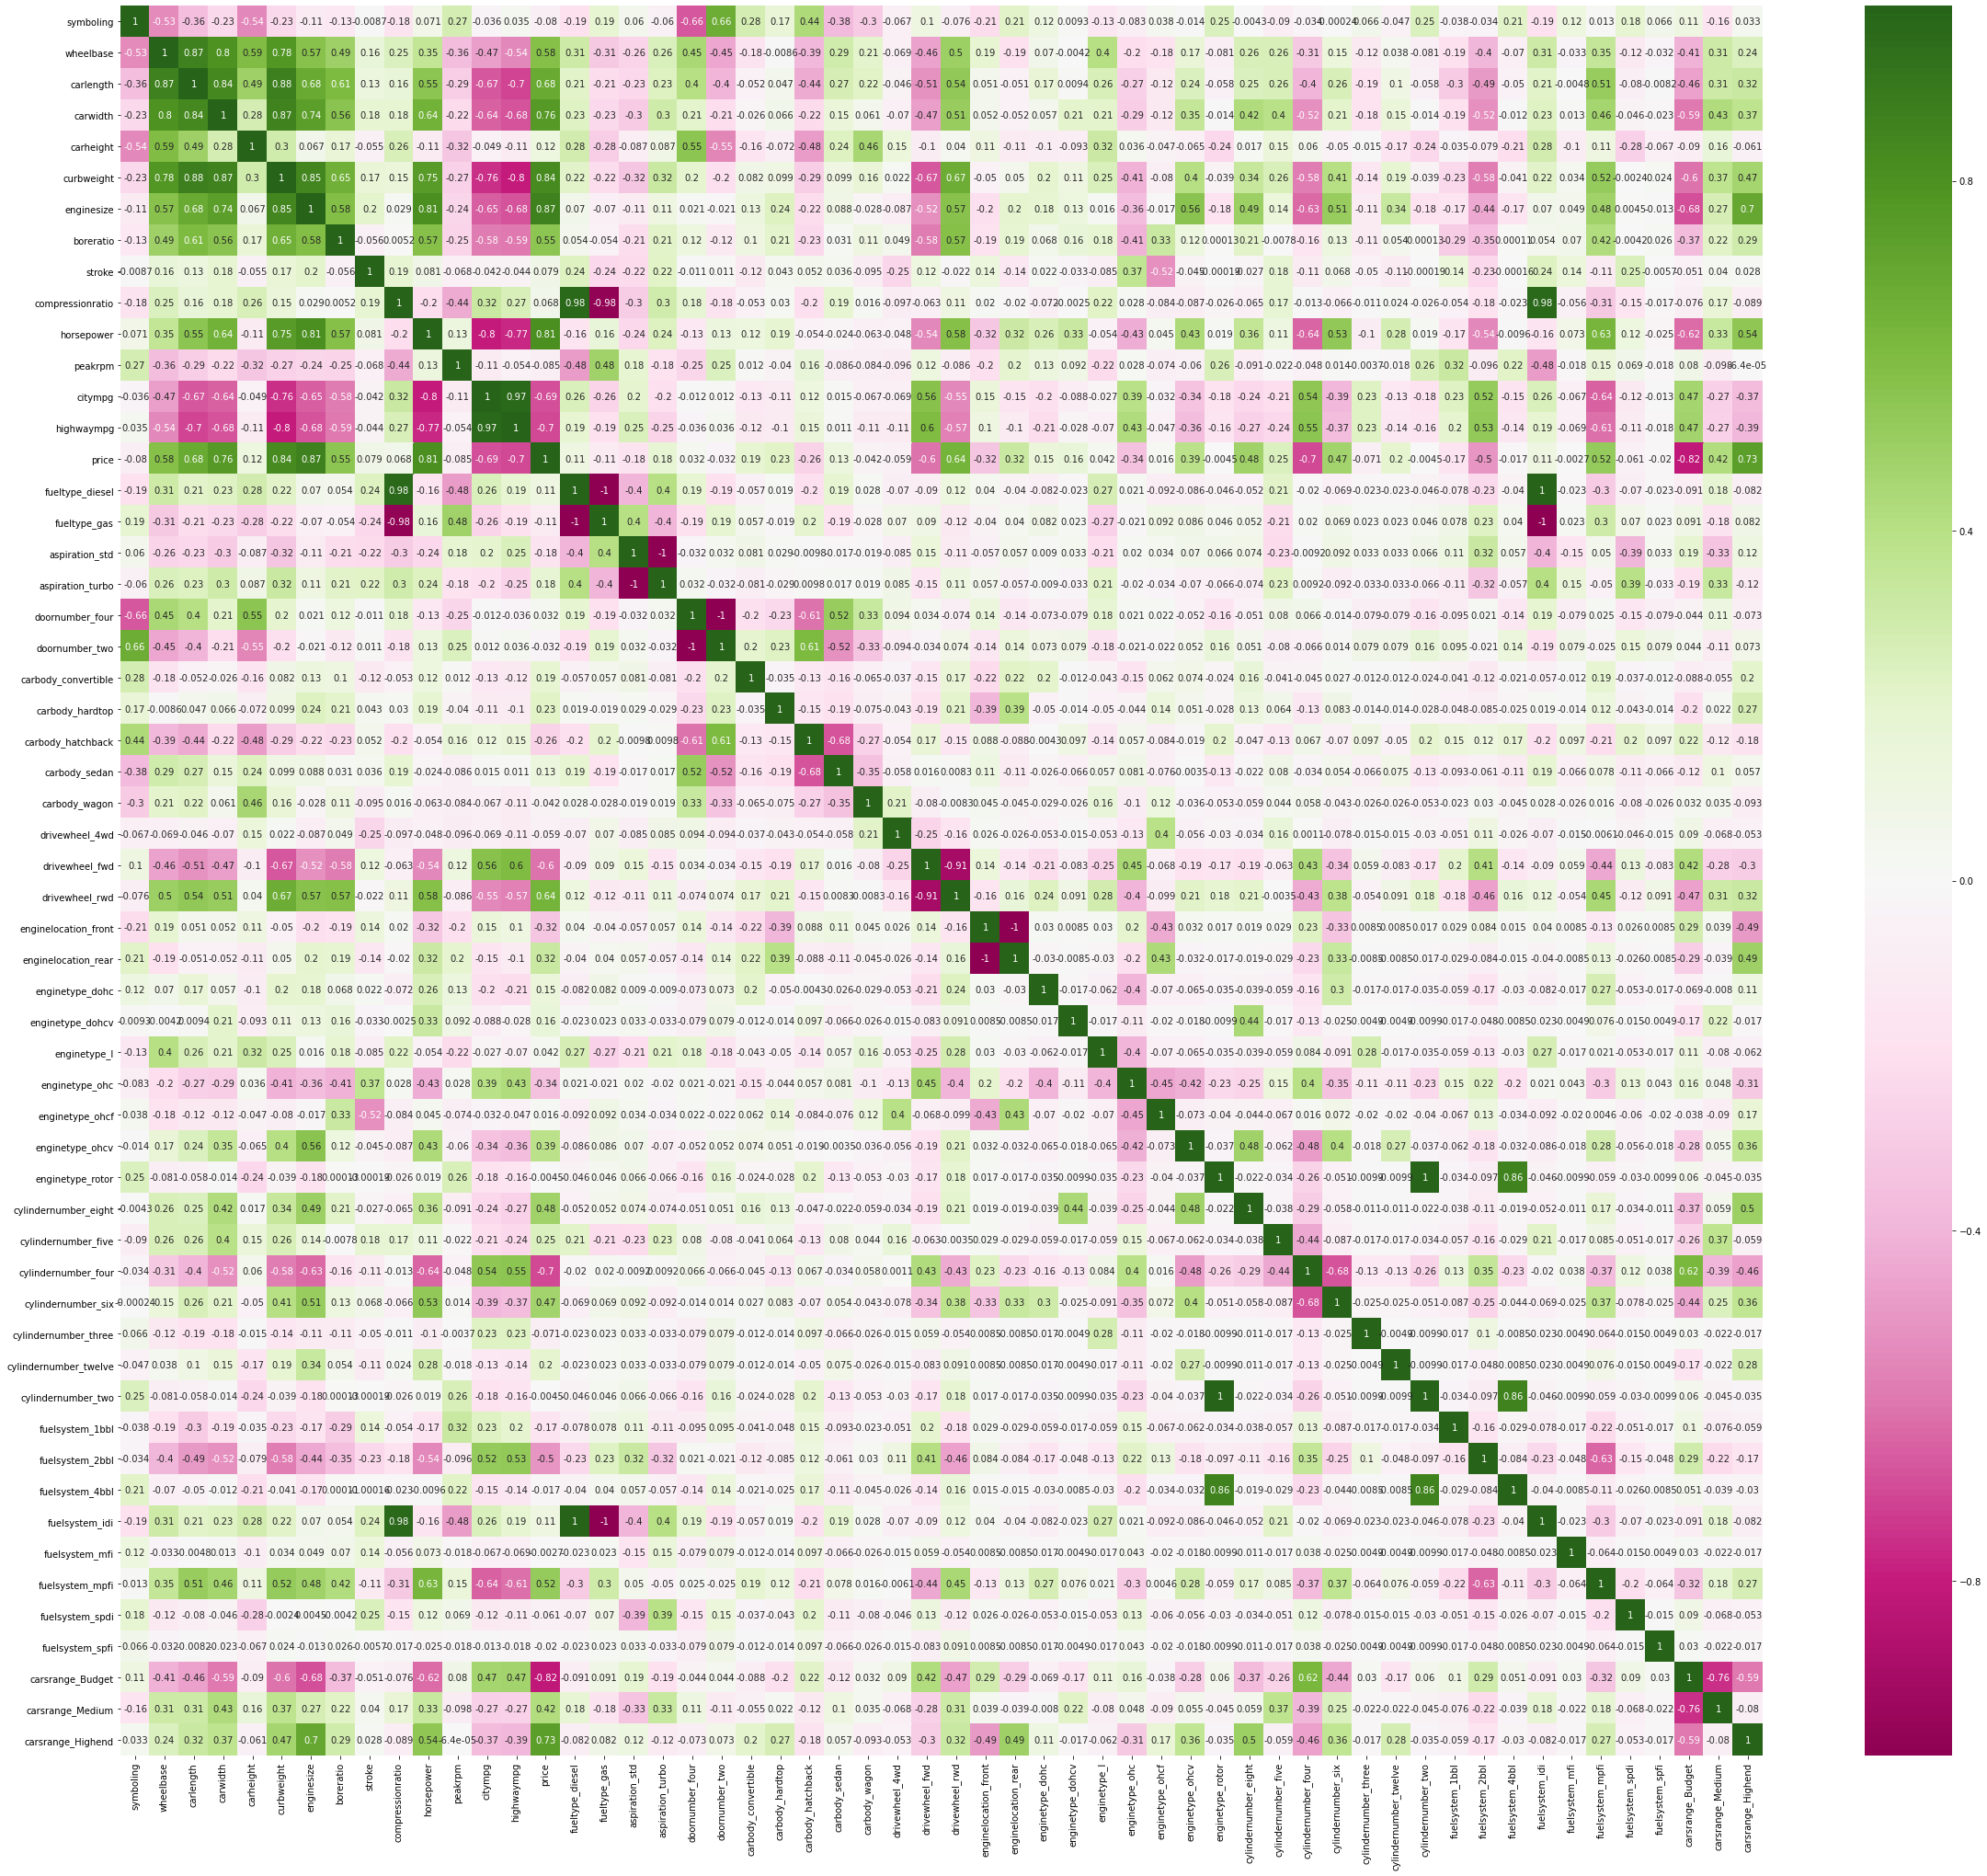

In [210]:
plt.figure(figsize = (40, 35))
sns.heatmap(df_final.corr(), annot=True, cmap="PiYG")
plt.show()

#### Na 15 linha, conseguimos identificar em verde todas as variáveis que mais possuem correlação com a coluna PRICE

### Separar nosso DF em treino e teste

In [187]:
from sklearn.model_selection import train_test_split

In [192]:
classe_y = df_final['price']
X = df_final.drop('price',axis=1)

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X,classe_y,test_size=0.3, random_state=42)

In [206]:
X_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carsrange_Budget,carsrange_Medium,carsrange_Highend
177,-1,102.4,175.6,66.5,53.9,2458,122,3.31,3.54,8.7,...,0,0,0,0,1,0,0,1,0,0
75,1,102.7,178.4,68.0,54.8,2910,140,3.78,3.12,8.0,...,0,0,0,0,1,0,0,1,0,0
174,-1,102.4,175.6,66.5,54.9,2480,110,3.27,3.35,22.5,...,0,0,1,0,0,0,0,1,0,0
31,2,86.6,144.6,63.9,50.8,1819,92,2.91,3.41,9.2,...,0,0,0,0,0,0,0,1,0,0
12,0,101.2,176.8,64.8,54.3,2710,164,3.31,3.19,9.0,...,0,0,0,0,1,0,0,0,1,0


### Instanciando o modelo

In [213]:
from sklearn.linear_model import LinearRegression

In [214]:
lr_model = LinearRegression()

In [215]:
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [216]:
# Visualizando os coeficientes (pesos!)
lr_model.coef_

array([-1.85072434e+02,  3.89919775e+01,  4.44035941e+01,  1.26125512e+02,
        5.79103863e+01,  1.39635729e+00,  6.19264862e+01, -1.56247420e+02,
       -3.11797044e+03,  5.48812595e+02,  2.58723247e+01,  1.14027828e+00,
       -1.53471834e+02,  7.68597252e+01, -1.62986161e+03,  1.62986161e+03,
       -5.63913941e+02,  5.63913941e+02, -1.30945631e+02,  1.30945631e+02,
        2.42402828e+03,  1.06462936e+03, -6.96275287e+02, -6.54352515e+02,
       -2.13802984e+03,  9.30967381e+02, -6.70520868e+02, -2.60446513e+02,
        1.36773742e+02, -1.36773742e+02, -9.15399204e+02, -5.49205705e+02,
        1.01257093e+03,  1.36731488e+03, -1.28931015e+03, -2.18926461e+03,
        2.56329386e+03,  2.58666045e+03,  2.75490836e+03, -3.09200032e+02,
        8.40442564e+02,  0.00000000e+00, -8.43610520e+03,  2.56329386e+03,
        3.28774946e+02, -7.36110957e+01,  5.31180329e+02, -1.62986161e+03,
        0.00000000e+00,  7.18203506e+02, -2.76733967e+01,  1.52987322e+02,
       -5.13846613e+03, -

### Predizendo o modelo

In [220]:
lr_model.predict(X_test)

array([26757.13603149, 20696.07419786,  9509.80933554, 13942.59592124,
       26171.14235111,  7004.07498293,  8929.19646405,  7696.58514882,
        8371.02334667,  9121.45546223, 16899.87836618,  8075.19656546,
       14613.25387622,  9614.36981833, 41076.10460318,  6245.48573759,
        1037.0153137 , 12532.42049231,  9078.99360136,  9529.74528925,
        9754.76824778, 16377.72065047,  8433.28373651,  2675.74897929,
        6348.33534395, 35357.21584023, 14813.11407837, 15407.60759533,
        5528.83498852, 16830.71826644, 27199.272867  ,  6275.69271241,
        7881.84641514, 22010.72979215,  8282.57202405, 28594.84406312,
       11939.50878441, 13638.01821356,  6168.83391896, 12660.71924594,
        6198.67480699, 11840.66999181, 17058.72875398,  6036.8058828 ,
        6760.68551095,  9406.66198906,  6275.69271241,  5663.41470583,
       15879.46420744, 12401.53026271,  6154.85747166, 16956.57564962,
        6998.5636276 ,  9438.09931665,  5510.68234377, 16309.78377498,
      

# Validando o modelo de Regressão

* Métrica de **RMSE**.
* Métrica utiliza medidas dependentes.

In [222]:
y_pred = lr_model.predict(X_test)

In [223]:
y_pred.shape

(62,)

In [224]:
y_test.shape

(62,)

In [227]:
# RMSE - Root Mean Square Error, verifica a diferença entre a previsão e o real
# Utiliza unidades dependentes
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test, lr_model.predict(X_test))**0.5
RMSE

2302.8846872128083

In [228]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.9234563694024959

In [232]:
 r2_square = r2_score(y_test, y_pred)
print('R2_Square : ',r2_square)
print('Accurarcy of model : ',r2_square*100)

R2_Square :  0.9234563694024959
Accurarcy of model :  92.34563694024959
